# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("/Users/Akshay/Documents/DataScience/ExcelR/Practice_DS/Python/LinearRegression/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [4]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


# Correlation

In [3]:
data.corr()# strong correlation btwn daily to sunday and sun to daily

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

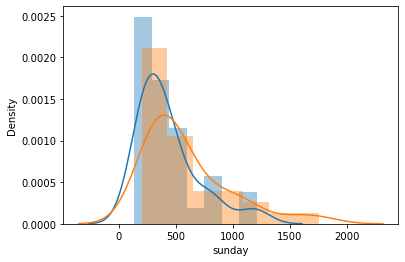

In [5]:
import seaborn as sns
sns.distplot(data['daily'])
sns.distplot(data['sunday'])

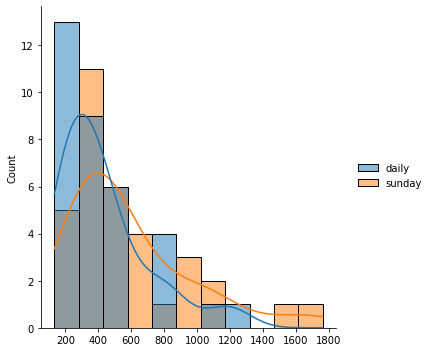

In [13]:
sns.displot(data=data,kind="hist",legend=True,kde=True)

Fitting a Linear Regression Model

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()#ols method is used to finf best fit line always give ('dependent variable~independent variable') in the fit algo for ols
model

In [35]:
object_methods = [method_name for method_name in dir(model) if callable(getattr(model, method_name))]#gives list of methods in the object
object_methods
#hasattr(model, "params")# checks for the attribute name present in the object
#dir(model)#gets the list of atributes and method name of the object

['_HCCM',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abat_diagonal',
 '_get_robustcov_results',
 '_is_nested',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'conf_int',
 'conf_int_el',
 'cov_params',
 'el_test',
 'f_test',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'load',
 'outlier_test',
 'predict',
 'remove_data',
 'save',
 'summary',
 'summary2',
 't_test',
 't_test_pairwise',
 'wald_test',
 'wald_test_terms']

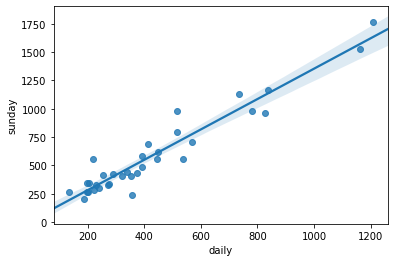

In [59]:
sns.regplot(x="daily", y="sunday", data=data);# regression plot the o/p gives wthr it is linera or not

In [36]:
#Coefficients
# Intercept is the b0 and daily is the slope i.e b1
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [38]:
#R squared values
(model.rsquared,model.rsquared_adj)#coefficient determination using r2 here value is greater than .9 so ite association/model is strong i.e accuracy is 90%+

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [47]:
#Predict for 600
array = pd.Series([600])
df = pd.DataFrame(array,columns=['daily'])#always while forming dataframe use columns of the independent variable for predicting the value
model.predict(df)

0    817.664485
dtype: float64

In [40]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [42]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [43]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64